In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.datasets import cifar100
from keras.layers import Dense, Activation, Dropout,Flatten
from tensorflow.keras import datasets, layers,models
from tensorflow import keras
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.utils import np_utils

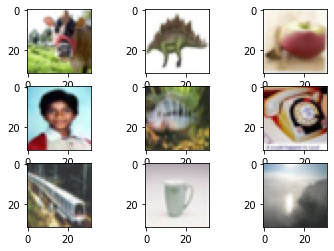

In [2]:
(X_train,y_train),(X_test,y_test) = cifar100.load_data()
for i in range(9):
 plt.subplot(330+i+1)
 plt.imshow(X_train[i])
plt.show()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train/=255
X_test/=255

from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train,100)
y_test = np_utils.to_categorical(y_test,100)

In [5]:
# Model
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout,Conv2D,MaxPooling2D,Flatten

# Create model
model = Sequential()

# Build Layer
model.add(Conv2D(32, (3,3), padding = 'same', input_shape=(32,32,3)))
model.add(Activation('relu'))

model.add(Conv2D(32, (3,3), padding = 'same'))
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3), padding = 'same'))
model.add(Activation('relu'))

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3), padding = 'same'))
model.add(Activation('relu'))

model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Dense(100)) #number of class
model.add(Activation('softmax'))

# Model complete
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                        

In [6]:
# Train model
from keras.optimizers import SGD, Adam, RMSprop
model.compile(loss='categorical_crossentropy', optimizer = RMSprop(), metrics = ['accuracy'])
CNN = model.fit(X_train,y_train,batch_size = 256, epochs = 20, validation_split = 0.3)
score = model.evaluate(X_test,y_test,batch_size = 256, verbose = 1)
print('Test score:',score[0])
print('Test accuracy:',score[1])

Epoch 1/20
137/137 [==============================] - 95s 684ms/step - loss: 4.2733 - accuracy: 0.0542 - val_loss: 3.8614 - val_accuracy: 0.1265
Epoch 2/20
137/137 [==============================] - 94s 688ms/step - loss: 3.7602 - accuracy: 0.1297 - val_loss: 3.4207 - val_accuracy: 0.1923
Epoch 3/20
137/137 [==============================] - 94s 689ms/step - loss: 3.4563 - accuracy: 0.1815 - val_loss: 3.3288 - val_accuracy: 0.2114
Epoch 4/20
137/137 [==============================] - 94s 687ms/step - loss: 3.2368 - accuracy: 0.2229 - val_loss: 3.0955 - val_accuracy: 0.2538
Epoch 5/20
137/137 [==============================] - 95s 691ms/step - loss: 3.0628 - accuracy: 0.2521 - val_loss: 2.9684 - val_accuracy: 0.2827
Epoch 6/20
137/137 [==============================] - 95s 697ms/step - loss: 2.8954 - accuracy: 0.2805 - val_loss: 2.8236 - val_accuracy: 0.3037
Epoch 7/20
137/137 [==============================] - 95s 692ms/step - loss: 2.7580 - accuracy: 0.3120 - val_loss: 2.7361 - val_ac

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


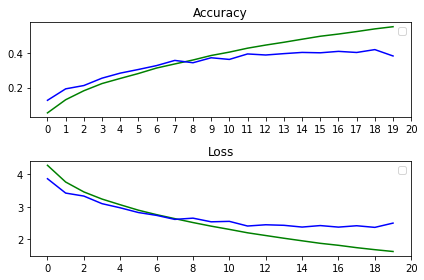

In [7]:
import numpy as np

# Accuracy
plt.subplot(211)
plt.title('Accuracy')
plt.plot(CNN.history['accuracy'],color = 'g')
plt.plot(CNN.history['val_accuracy'],color = 'b')
plt.legend(loc = 'best')
plt.xticks(np.arange(0,21,1))

# Loss
plt.subplot(212)
plt.title('Loss')
plt.plot(CNN.history['loss'],color = 'g')
plt.plot(CNN.history['val_loss'],color = 'b')
plt.legend(loc = 'best')
plt.xticks(np.arange(0,21,2))

plt.tight_layout()
plt.show()

Position of number:1
1/1 [==============================] - 0s 26ms/step
63


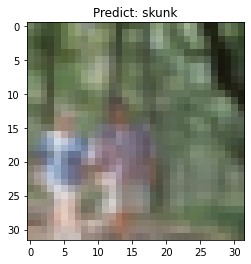

In [11]:
Label = ['beaver', 'dolphin', 'otter', 'seal', 'whale',
        'aquarium fish', 'flatfish, ray', 'shark', 'trout',
        'orchids', 'poppies', 'roses', 'sunflowers', 'tulips',
        'bottles', 'bowls', 'cans', 'cups', 'plates',
        'apples', 'mushrooms', 'oranges', 'pears', 'sweet peppers',
        'clock', 'computer keyboard', 'lamp', 'telephone', 'television',
        'bed', 'chair', 'couch', 'table', 'wardrobe',
        'bee', 'beetle', 'butterfly', 'caterpillar', 'cockroach',
        'bear', 'leopard', 'lion', 'tiger', 'wolf',
        'bridge', 'castle', 'house', 'road', 'skyscraper',
        'cloud', 'forest', 'mountain', 'plain', 'sea',
        'camel', 'cattle', 'chimpanzee', 'elephant', 'kangaroo',
        'fox', 'porcupine', 'possum', 'raccoon', 'skunk',
        'crab', 'lobster', 'snail', 'spider', 'worm',
        'baby', 'boy', 'girl', 'man', 'woman',
        'crocodile', 'dinosaur', 'lizard', 'snake', 'turtle',
        'hamster', 'mouse', 'rabbit', 'shrew', 'squirrel',
        'maple', 'oak', 'palm', 'pine', 'willow',
        'bicycle', 'bus', 'motorcycle', 'pickup truck', 'train',
        'lawn-mower', 'rocket', 'streetcar', 'tank', 'tractor']

num = int(input('Position of number:'))
num_predict = np.argmax(model.predict(X_test[num].reshape((1,32,32,3))))
plt.title("Predict: " + str(Label[num_predict]))
plt.imshow(X_test[num],cmap=plt.get_cmap('gray'))
print(num_predict)

Test loss=  2.4722073078155518
Test accuracy=  0.3905999958515167


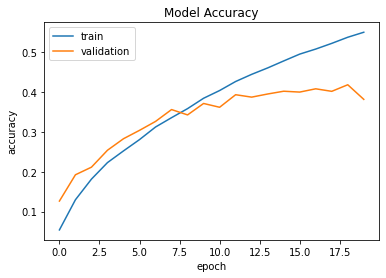

In [12]:
score = model.evaluate(X_test,y_test,verbose=10)
print('Test loss= ',score[0])
print('Test accuracy= ',score[1])
plt.plot(CNN.history['accuracy'])
plt.plot(CNN.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'],loc='upper left')